![This is an image](Quant-Trading.jpg)

<font size="3">
Please visit our website <a href="https://www.quant-trading.co" target="_blank">quant-trading.co</a> for more tools on quantitative finance and data science.
</font>

# **MONTECARLO SIMULATION - COX, INGERSOLL, ROSS - CIR**

## **¿How can you build a montercarlo simulation for CIR process?**

<font size="3"> Montecarlo simulation is a powerful technique that allows you visualize different paths a financial asset could take in the future. You can also use this technique for derivatives pricing. In this notebook we are showing how you can run a montecarlo simulation for a Cox, Ingersoll, Ross - CIR process in python. Remember that a CIR process is one of the most used stochastic processes in finance to model the behavior of interest rates. If you would like to know more about the mathematic of this process please look here <a href="https://quant-trading.co/category/tools/" target="_blank">MONTECARLO</a>.<br><br>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from numpy.random import rand
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

## **Define all the required parameters**

<font size="3"> We need to define some parameters such as: a) The number of simulations that we are going to run, b) The number of steps to use in each path the asset will follow, c) The initial interest rate, d) The time step in the simulation, e) The mean reversion speed, f) The long run mean of interest rates, g) The volatility of interest rates, h) The degrees of freedom. <br><br>

In [2]:
M = 1000               #Number of paths - We are using 1000 paths for illustrative purposes - The more paths, the more accurate.
N = 250                #Number of steps - We are using daily steps. In one year there are apox 250 working days
r0 = 0.055             #Initial r - interest rate
T=1                    #Time to maturity - We are using one year
delta_t = T/N          #Time step for the simulation. 
kappa = 2              #Mean reversion speed
theta = 0.03           #Long run mean
sigma = 0.2            #Volatility

d = 4*theta*kappa/sigma**2  #Degrees of freedom

## **Generate uniformly distributed random variables**

<font size="3"> We can use the rand function to generate uniformly distributed random variables as following <br><br>

In [3]:
x = rand(M,N)
x

array([[0.01205073, 0.97109722, 0.20353894, ..., 0.66916068, 0.56611182,
        0.78784328],
       [0.12656258, 0.18154418, 0.97146936, ..., 0.25095602, 0.61042212,
        0.5164235 ],
       [0.1646869 , 0.99406105, 0.05898816, ..., 0.09901266, 0.46480513,
        0.7215405 ],
       ...,
       [0.11970641, 0.79848472, 0.08378333, ..., 0.59227132, 0.75865386,
        0.98772307],
       [0.57003049, 0.46262492, 0.08482787, ..., 0.24756422, 0.78205979,
        0.32093078],
       [0.94736512, 0.64513452, 0.95099722, ..., 0.74477798, 0.39300162,
        0.46598174]])

## **Initialize the inverse Chi Square function and generate random variables**

<font size="3"> We need to transform the previously generated uniform random variables into Chi Squared variables. We can do that using the inverse Chi Square function as following.<br><br>

In [4]:
ncx2inv = scipy.stats.distributions.ncx2.ppf                                     #Non Central Chi Square inverse function       

## **Create a vector with the initial interest rate**

<font size="3"> We need to create a column vector that contains the initial interest rate. The number of rows will be equal to the number of simulations that we are going to run<br><br>

In [5]:
initial_r=r0*np.ones((M,1))                                                         #Initial r vector
initial_r[0:5]

array([[0.055],
       [0.055],
       [0.055],
       [0.055],
       [0.055]])

## **Create a matrix**

<font size="3"> We need to store the results from our montecarlo simulation, so we create a matrix with M rows and d columns. Then we append the previously created interest rate vector to it<br><br>

In [6]:
r = np.zeros((M,N))                                                                 #Declaration of the interest rate matrix (r)
r = np.append(initial_r,r,axis=1) 

r

array([[0.055, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.055, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.055, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.055, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.055, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.055, 0.   , 0.   , ..., 0.   , 0.   , 0.   ]])

## **Create a matrix for w and lamda**

<font size="3"> We need to create matrixes for w and lamda, which are auxiliary variables for our calculations<br><br>

In [7]:
w = np.zeros((M,N))
lamda = np.zeros((M,N))

## **Generate the simulation paths**

<font size="3"> Using the discretized equation of the geometric brownian motion and the matrix of normal random variables we can create the paths for our simulation as follows<br><br>

In [8]:
#Calculate the paths

for i in range(0,N):
    coeff1 = 4*kappa
    coeff2 = (sigma**2)*(1-np.exp(-kappa*delta_t))
    coeff3 = np.exp(-kappa*delta_t)
    
    lamda[:,i] = r[:,i]*((coeff1*coeff3)/coeff2)                                 #Non central parameter according to the notes in Glasserman
    
    w[:,i] = ncx2inv(x[:,i],d,lamda[:,i])                                       #We generate a vector of non central chi squares
                                                                                #ncx2.ppf(prb, df, nc)-> df:degrees of freedom, nc:Non centrality parameter
    r[:,i+1]=(coeff2/coeff1)*w[:,i]

r

array([[0.055     , 0.04830657, 0.05351244, ..., 0.01303149, 0.01336793,
        0.01465192],
       [0.055     , 0.05144011, 0.04866625, ..., 0.00704462, 0.00748903,
        0.00767391],
       [0.055     , 0.05192011, 0.05917218, ..., 0.01858929, 0.01848891,
        0.01956161],
       ...,
       [0.055     , 0.05134386, 0.05354658, ..., 0.11810091, 0.12041323,
        0.12966812],
       [0.055     , 0.05528301, 0.05476446, ..., 0.02094063, 0.02241827,
        0.02156996],
       [0.055     , 0.05964625, 0.06051968, ..., 0.02527345, 0.02473047,
        0.02456381]])

## **Plot the results**

<font size="3"> We can plot the results as follows<br><br>

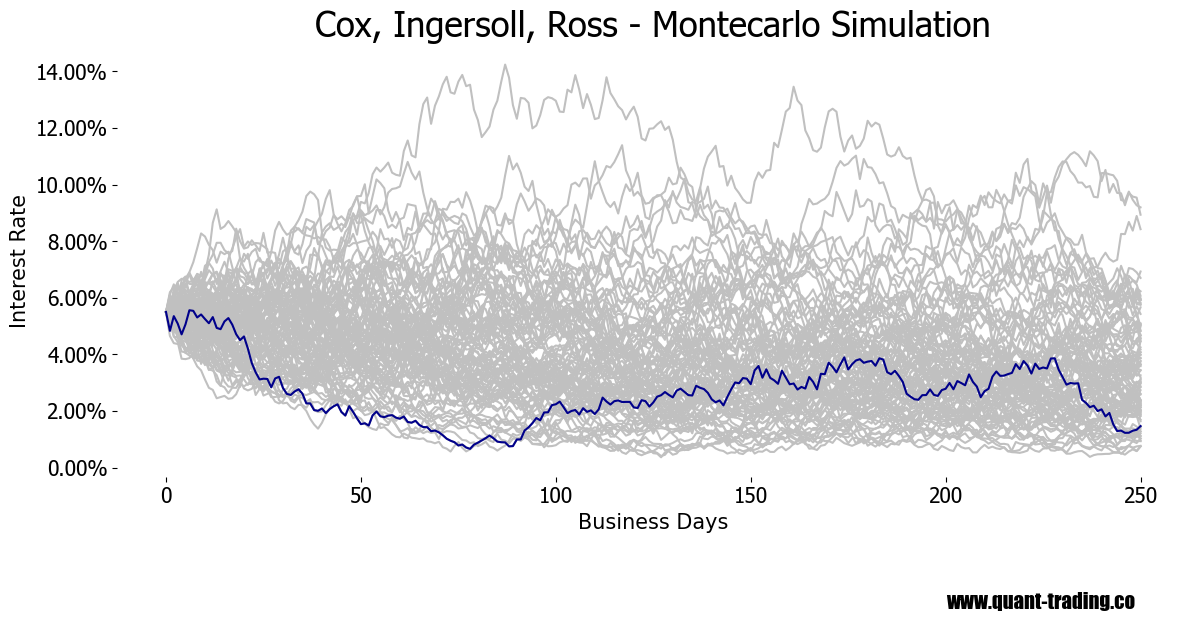

In [12]:
#Plot the paths        

fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.plot(r[0:100,:].transpose()*100,c='silver')
ax.plot(r[0:1,:].transpose()*100,c='darkblue')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f%%'))
ax.set_facecolor('white') 

plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
plt.ylabel("Interest Rate",fontsize=15)
plt.xlabel("Business Days",fontsize=15)


plt.title("Cox, Ingersoll, Ross - Montecarlo Simulation", size=25, family='Tahoma')
plt.box(on=None)


plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)
plt.text(200, np.min(r[0:100,:])-5,'www.quant-trading.co' , color='black', fontsize=15,family='Impact')
plt.show()

If this content is helpful and you want to make a donation please click on the button

[![paypal](https://www.paypalobjects.com/en_US/i/btn/btn_donateCC_LG.gif)](https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=29CVY97MEQ9BY)